In [1]:
using HTTP
using JSON
using DataFrames
using Dates
using TimeSeries

In [2]:
include("../env.jl")

"VVp9vMTjNvSEUqJJuqpRLw5r4oUq2uFGbX2VipCE"

In [3]:
function wgetStock(sym::String)
    fromTime =  Dates.format(now()-Day(500), "yyyy-mm-ddTHH:MM:SS")
    @show fromTime
    headers = ["APCA-API-KEY-ID" => ENV["APCA-API-KEY-ID"], "APCA-API-SECRET-KEY" => ENV["APCA-API-SECRET-KEY"] ]
    url_query = "https://data.alpaca.markets/v1/bars/day?symbols="*sym*"&after="*fromTime*"&limit=500"
    raw_response = HTTP.request("GET", url_query, headers)
    rsp = JSON.parse(String(raw_response.body))
    df2 = DataFrame(t = Int[],h = Float32[],l = Float32[],o = Float32[],c = Float32[],v = Float32[] )
    for (sym,v) in rsp
        for q in v
            push!(df2,q)
        end
    end
    transform!(df2, :t => ( x -> Dates.unix2datetime.(x) ) => :ondate)
    DataFrames.rename!(df2,:h => :High)
    DataFrames.rename!(df2,:l => :Low)
    DataFrames.rename!(df2,:o => :Open)
    DataFrames.rename!(df2,:c => :Close)
    DataFrames.rename!(df2,:v => :Volume)
    sort!(df2,order(:ondate))
    return select(df2,[:Open,:Close,:High,:Low,:Volume,:ondate])
end

wgetStock (generic function with 1 method)

In [4]:
tick1="GLD"
df1 = wgetStock(tick1)
tick2="IAU"
df2 = wgetStock(tick2)

fromTime = "2020-02-02T19:23:18"
fromTime = "2020-02-02T19:23:23"


,Open,Close,High,Low,Volume,ondate
,Float32,Float32,Float32,Float32,Float32,DateTime
1,13.37,13.39,13.405,13.29,1.66859e7,2019-06-21T04:00:00
2,13.47,13.58,13.59,13.44,2.22944e7,2019-06-24T04:00:00
3,13.69,13.61,13.75,12.86,5.52916e7,2019-06-25T04:00:00
4,13.5,13.48,13.55,13.43,1.58035e7,2019-06-26T04:00:00
5,13.43,13.48,13.49,13.41,1.53106e7,2019-06-27T04:00:00
6,13.49,13.505,13.53,13.45,8.48827e6,2019-06-28T04:00:00
7,13.35,13.25,13.36,13.24,2.35873e7,2019-07-01T04:00:00
8,13.32,13.53,13.55,13.3,2.23973e7,2019-07-02T04:00:00
9,13.55,13.56,13.6,13.51,1.96778e7,2019-07-03T04:00:00


In [5]:
using Pkg 
Pkg.add("StatsBase")
using StatsBase
Pkg.add("HypothesisTests")
using HypothesisTests

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [6]:

using Plots
function testStationary(df)
    y = autocor(df,1:20)
    display(bar(y))
    y = pacf(df,1:20)
    display(bar(y))
    ADFTest(df,:none,1)
end

testStationary (generic function with 1 method)

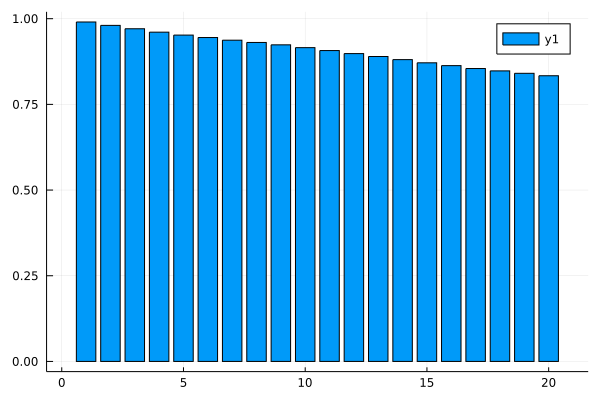

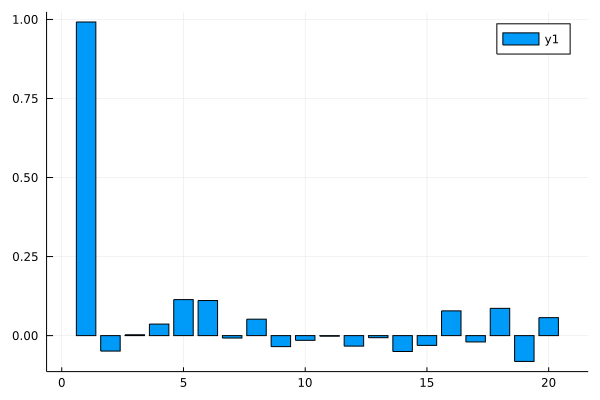

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          0.000395352

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8880

Details:
    sample size in regression:          498
    number of lags:                     1
    ADF statistic:                      0.817505
    Critical values at 1%, 5%, and 10%: [-2.57023 -1.94155 -1.6163]


In [7]:
testStationary(df1[!,:Close])

In [8]:
Pkg.add("TimeSeries")
using TimeSeries

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [9]:
ta1 = TimeArray(df1;timestamp = :ondate)
ta2 = TimeArray(df2;timestamp = :ondate)
merge(ta1[:Close],ta2[:Close],colnames = [:Close1,:Close2])

500×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-21T04:00:00 to 2021-06-15T04:00:00
│                     │ Close1 │ Close2 │
├─────────────────────┼────────┼────────┤
│ 2019-06-21T04:00:00 │ 132.0  │ 13.39  │
│ 2019-06-24T04:00:00 │ 133.94 │ 13.58  │
│ 2019-06-25T04:00:00 │ 134.2  │ 13.61  │
│ 2019-06-26T04:00:00 │ 132.97 │ 13.48  │
│ 2019-06-27T04:00:00 │ 132.84 │ 13.48  │
│ 2019-06-28T04:00:00 │ 133.17 │ 13.505 │
│ 2019-07-01T04:00:00 │ 130.6  │ 13.25  │
│ 2019-07-02T04:00:00 │ 133.38 │ 13.53  │
│ 2019-07-03T04:00:00 │ 133.64 │ 13.56  │
│ 2019-07-05T04:00:00 │ 132.16 │ 13.4   │
│ 2019-07-08T04:00:00 │ 131.29 │ 13.32  │
│ 2019-07-09T04:00:00 │ 131.78 │ 13.365 │
   ⋮
│ 2021-06-01T04:00:00 │ 177.93 │ 36.2   │
│ 2021-06-02T04:00:00 │ 178.75 │ 36.37  │
│ 2021-06-03T04:00:00 │ 175.25 │ 35.645 │
│ 2021-06-04T04:00:00 │ 177.17 │ 36.04  │
│ 2021-06-07T04:00:00 │ 177.88 │ 36.185 │
│ 2021-06-08T04:00:00 │ 177.3  │ 36.07  │
│ 2021-06-09T04:00:00 │ 176.97 │ 36.0   │
│ 2021-06-10T04

In [10]:
pct1 = percentchange(ta1[:Close])
pct2 = percentchange(ta2[:Close])
pct = merge(pct1,pct2)
TimeSeries.rename!(pct,:Close => :Close1)
TimeSeries.rename!(pct,:Close_1 => :Close2)
dif = TimeSeries.rename(pct[:Close1] .- pct[:Close2], :Close1_Close2 => :Diff) 
data = merge(pct,dif)
df = DataFrame(data[3:9])
current = DataFrame(data[10])
@show df[3,:Close1]
@show size(current)
current[1,:Close1]

df[3, :Close1] = 0.0024840639f0
size(current) = (1, 4)


-0.006582909f0

mean(df[!, :Diff]) = -6.565548f-6
std(df[!, :Diff]) = 0.0004495581f0


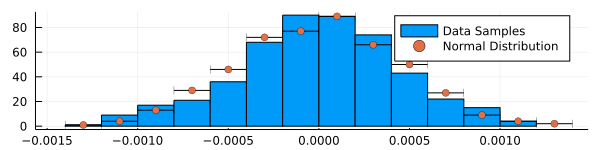

In [90]:
using Random, Distributions
using StatsBase
df = DataFrame(data)

lower = quantile(df[:,:Diff], 0.01)
upper = quantile(df[:,:Diff], 0.99)
df = filter(:Diff => x -> x > lower, df)
df = filter(:Diff => x -> x < upper, df)
@show mean(df[!,:Diff])
@show std(df[!,:Diff])
histogram(df[!,:Diff], labels="Data Samples")
d=fit(Normal, df[!,:Diff])
n = length(df[:,:Diff])
plot!(rand(d, n), seriestype=:scatterhist, linestyle=:solid, size=(600,150),labels="Normal Distribution")


In [12]:
@show mean(rand(d,10000))
@show std(rand(d,10000))

mean(rand(d, 10000)) = -1.5093697451098668e-5
std(rand(d, 10000)) = 0.0004489137885456394


0.0004489137885456394

In [13]:
@show mean(rand(d,10000))
@show std(rand(d,10000))

mean(rand(d, 10000)) = -5.990527130357944e-6
std(rand(d, 10000)) = 0.0004482482734408996


0.0004482482734408996

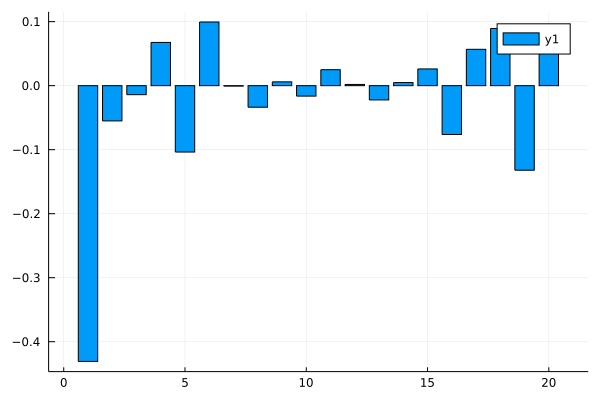

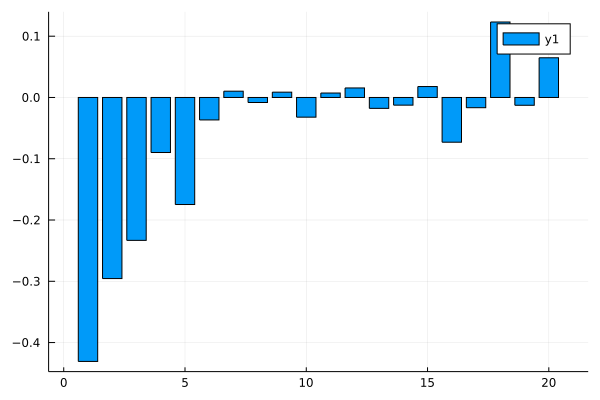

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.85216

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          487
    number of lags:                     1
    ADF statistic:                      -25.251
    Critical values at 1%, 5%, and 10%: [-2.57033 -1.94156 -1.61629]


In [14]:
testStationary(df[!,:Diff])

In [15]:
# Import Turing and Distributions.
using Turing, Distributions



# Import MCMCChains, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# We need a logistic function, which is provided by StatsFuns.
using StatsFuns: logistic

# Functionality for splitting and normalizing the data
using MLDataUtils: rescale!

# Set a seed for reproducibility.
using Random
Random.seed!(0);

In [16]:
# Bayesian logistic regression (LR)
@model linearPair(y0,y1,n) = begin
    u ~ Normal(1,0.1)
    for i = 1:n
        y1[i] ~ Normal( u*y0[i],0.1)
    end
end;

In [17]:

n,_ = size(df)
@show n
train = Matrix(df)


n = 489


489×4 Matrix{Any}:
 2019-06-24T04:00:00   0.0146967     0.0141898    0.000506943
 2019-06-25T04:00:00   0.00194118    0.002209    -0.000267822
 2019-06-26T04:00:00  -0.00916546   -0.00955187   0.000386403
 2019-06-27T04:00:00  -0.000977515   0.0         -0.000977515
 2019-06-28T04:00:00   0.00248406    0.00185471   0.000629357
 2019-07-01T04:00:00  -0.0192983    -0.018882    -0.000416283
 2019-07-02T04:00:00   0.0212862     0.0211321    0.000154119
 2019-07-03T04:00:00   0.0019493     0.00221736  -0.000268063
 2019-07-05T04:00:00  -0.0110747    -0.0117995    0.000724752
 2019-07-08T04:00:00  -0.00658291   -0.00597023  -0.000612681
 2019-07-09T04:00:00   0.00373248    0.0033786    0.000353875
 2019-07-10T04:00:00   0.0154804     0.0153385    0.000141866
 2019-07-11T04:00:00  -0.00836951   -0.00736917  -0.00100034
 ⋮                                                           
 2021-05-28T04:00:00   0.00298133    0.00276542   0.000215911
 2021-06-01T04:00:00  -0.0021311    -0.00165468  -0.

In [18]:



# Sample using HMC.
chain = mapreduce(c -> sample(linearPair(train[:,2],train[:,3],n),NUTS(200, 0.65), 1000, discard_adapt=true),
    chainscat,
    1:5
)

describe(chain)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|███████

2-element Vector{ChainDataFrame}:
 Summary Statistics (1 x 8)
 Quantiles (1 x 6)

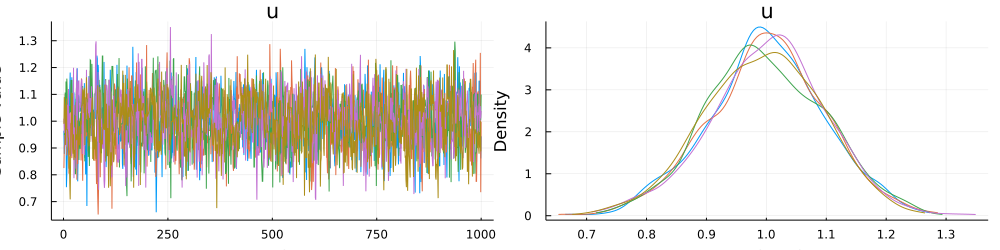

In [19]:
#plot(chain)

In [20]:
chain

Chains MCMC chain (1000×13×5 Array{Float64, 3}):

Start time        = 2021-06-16T11:25:01.798
Stop time         = 2021-06-16T11:25:13.553
Wall duration     = 11.76 seconds
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4, 5
Samples per chain = 1000
parameters        = u
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           u    0.9996    0.0975     0.0014    0.0022   1907.0600    1.0007    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

         

In [21]:
lookback = 12
for (row_index,row) in enumerate(eachrow(pct))
    @show row.timestamp
    @show row.Close1
    @show row.Close2
    @show row_index
    if row_index >= lookback
        i = row_index
        @show size(pct[i-lookback+1:i])
        @show pct[i-lookback+1:i]
        @show values(mean(pct[i-lookback+1:i]))
        
    end
    
end

row.timestamp = DateTime("2019-06-24T04:00:00")
row.Close1 = 0.014696737f0
row.Close2 = 0.014189794f0
row_index = 1
row.timestamp = DateTime("2019-06-25T04:00:00")
row.Close1 = 0.0019411783f0
row.Close2 = 0.0022090003f0
row_index = 2
row.timestamp = DateTime("2019-06-26T04:00:00")
row.Close1 = -0.009165464f0
row.Close2 = -0.009551867f0
row_index = 3
row.timestamp = DateTime("2019-06-27T04:00:00")
row.Close1 = -0.0009775149f0
row.Close2 = 0.0f0
row_index = 4
row.timestamp = DateTime("2019-06-28T04:00:00")
row.Close1 = 0.0024840639f0
row.Close2 = 0.001854707f0
row_index = 5
row.timestamp = DateTime("2019-07-01T04:00:00")
row.Close1 = -0.019298261f0
row.Close2 = -0.018881978f0
row_index = 6
row.timestamp = DateTime("2019-07-02T04:00:00")
row.Close1 = 0.021286238f0
row.Close2 = 0.021132119f0
row_index = 7
row.timestamp = DateTime("2019-07-03T04:00:00")
row.Close1 = 0.0019493004f0
row.Close2 = 0.0022173633f0
row_index = 8
row.timestamp = DateTime("2019-07-05T04:00:00")
row.Close1 = -0.01107

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0028478624 0.0028818746]
row.timestamp = DateTime("2019-08-20T04:00:00")
row.Close1 = 0.00796469f0
row.Close2 = 0.008036308f0
row_index = 41
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-05T04:00:00 to 2019-08-20T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0038353642 0.0038528393]
row.timestamp = DateTime("2019-08-21T04:00:00")
row.Close1 = -0.0032343897f0
row.Close2 = -0.0038126558f0
row_index = 42
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-06T04:00:00 to 2019-08-21T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0023883863 0.0023558792]
row.timestamp = DateTime("2019-08-22T04:00:00")
row.Close1 = -0.0025392664f0
row.Close2 = -0.0020877947f0
row_index = 43
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 Ti

row.Close1 = -0.015314358f0
row.Close2 = -0.015373753f0
row_index = 69
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-13T04:00:00 to 2019-09-30T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0014146864 -0.0013642008]
row.timestamp = DateTime("2019-10-01T04:00:00")
row.Close1 = 0.005328017f0
row.Close2 = 0.005677784f0
row_index = 70
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-16T04:00:00 to 2019-10-01T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.00028083113 -0.00030952157]
row.timestamp = DateTime("2019-10-02T04:00:00")
row.Close1 = 0.011818079f0
row.Close2 = 0.011997092f0
row_index = 71
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-17T04:00:00 to 2019-10-02T04:00:00
values(mean(pct[(i - lookback) + 1

row.timestamp = DateTime("2019-11-07T05:00:00")
row.Close1 = -0.015590406f0
row.Close2 = -0.015082616f0
row_index = 97
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-23T04:00:00 to 2019-11-07T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0011099329 -0.0010867807]
row.timestamp = DateTime("2019-11-08T05:00:00")
row.Close1 = -0.006436525f0
row.Close2 = -0.0064102304f0
row_index = 98
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-24T04:00:00 to 2019-11-08T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0018662229 -0.0018552234]
row.timestamp = DateTime("2019-11-11T05:00:00")
row.Close1 = -0.0025473519f0
row.Close2 = -0.0028673946f0
row_index = 99
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-25T04:00:00 to 2

row.timestamp = DateTime("2019-12-18T05:00:00")
row.Close1 = -7.199982f-5
row.Close2 = -0.0003544656f0
row_index = 125
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-03T05:00:00 to 2019-12-18T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00074083125 0.0007558759]
row.timestamp = DateTime("2019-12-19T05:00:00")
row.Close1 = 0.002374125f0
row.Close2 = 0.0017725423f0
row_index = 126
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-04T05:00:00 to 2019-12-19T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00012221052 9.444106f-6]
row.timestamp = DateTime("2019-12-20T05:00:00")
row.Close1 = -0.0012199584f0
row.Close2 = -0.0007076143f0
row_index = 127
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-05T05:00:00 to 2019

row.Close1 = -0.0001349358f0
row.Close2 = 0.00066397764f0
row_index = 153
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-14T05:00:00 to 2020-01-30T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0015107212 0.0015160466]
row.timestamp = DateTime("2020-01-31T05:00:00")
row.Close1 = 0.0061975047f0
row.Close2 = 0.0059720273f0
row_index = 154
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-15T05:00:00 to 2020-01-31T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0020957764 0.002070023]
row.timestamp = DateTime("2020-02-03T05:00:00")
row.Close1 = -0.006694695f0
row.Close2 = -0.0062664277f0
row_index = 155
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-16T05:00:00 to 2020-02-03T05:00:00
values(mean(pct[(i - lookback) 

row_index = 181
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-02-25T05:00:00 to 2020-03-11T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0010422523 -0.0010712756]
row.timestamp = DateTime("2020-03-12T04:00:00")
row.Close1 = -0.03949865f0
row.Close2 = -0.04030714f0
row_index = 182
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-02-26T05:00:00 to 2020-03-12T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0028288355 -0.002906467]
row.timestamp = DateTime("2020-03-13T04:00:00")
row.Close1 = -0.030503757f0
row.Close2 = -0.029333454f0
row_index = 183
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-02-27T05:00:00 to 2020-03-13T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.005707784 -0.0056720525]
row.timest

row.Close1 = -0.005011832f0
row.Close2 = -0.004571922f0
row_index = 214
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-13T04:00:00 to 2020-04-28T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0012103937 0.0012464836]
row.timestamp = DateTime("2020-04-29T04:00:00")
row.Close1 = 0.005752356f0
row.Close2 = 0.006123859f0
row_index = 215
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-14T04:00:00 to 2020-04-29T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00020270103 0.000100498284]
row.timestamp = DateTime("2020-04-30T04:00:00")
row.Close1 = -0.01895215f0
row.Close2 = -0.018867943f0
row_index = 216
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-15T04:00:00 to 2020-04-30T04:00:00
values(mean(pct[(i - lookback) + 

row.Close2 = 0.010591895f0
row_index = 242
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-21T04:00:00 to 2020-06-08T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0024622923 -0.0024665846]
row.timestamp = DateTime("2020-06-09T04:00:00")
row.Close1 = 0.009455279f0
row.Close2 = 0.00924784f0
row_index = 243
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-22T04:00:00 to 2020-06-09T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0004695563 -0.00049975095]
row.timestamp = DateTime("2020-06-10T04:00:00")
row.Close1 = 0.014577234f0
row.Close2 = 0.014660933f0
row_index = 244
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-26T04:00:00 to 2020-06-10T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0002418277

row.Close2 = 0.007871692f0
row_index = 270
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-01T04:00:00 to 2020-07-17T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0013923362 0.0013991593]
row.timestamp = DateTime("2020-07-20T04:00:00")
row.Close1 = 0.004583819f0
row.Close2 = 0.0049177534f0
row_index = 271
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-02T04:00:00 to 2020-07-20T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.002162711 0.002152103]
row.timestamp = DateTime("2020-07-21T04:00:00")
row.Close1 = 0.012285703f0
row.Close2 = 0.012089747f0
row_index = 272
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-06T04:00:00 to 2020-07-21T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0030014208 0.00

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0025250635 0.0025159968]
row.timestamp = DateTime("2020-08-31T04:00:00")
row.Close1 = 0.0023865523f0
row.Close2 = 0.0028455134f0
row_index = 301
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-14T04:00:00 to 2020-08-31T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0007655243 0.0008300399]
row.timestamp = DateTime("2020-09-01T04:00:00")
row.Close1 = 0.0009736984f0
row.Close2 = 0.00079830544f0
row_index = 302
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-17T04:00:00 to 2020-09-01T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0012148031 0.001209853]
row.timestamp = DateTime("2020-09-02T04:00:00")
row.Close1 = -0.012918229f0
row.Close2 = -0.013297758f0
row_index = 303
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 

values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.00031549353 -0.00030459583]
row.timestamp = DateTime("2020-10-09T04:00:00")
row.Close1 = 0.018047078f0
row.Close2 = 0.018539192f0
row_index = 329
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-09-24T04:00:00 to 2020-10-09T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0029798422 0.0030084949]
row.timestamp = DateTime("2020-10-12T04:00:00")
row.Close1 = -0.0028716738f0
row.Close2 = -0.0032600553f0
row_index = 330
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-09-25T04:00:00 to 2020-10-12T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.002435399 0.0024552934]
row.timestamp = DateTime("2020-10-13T04:00:00")
row.Close1 = -0.015839627f0
row.Close2 = -0.014990562f0
row_index = 331
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0002488254 0.00025634092]
row.timestamp = DateTime("2020-11-18T05:00:00")
row.Close1 = -0.005553029f0
row.Close2 = -0.005577212f0
row_index = 357
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-11-03T05:00:00 to 2020-11-18T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0010179133 -0.001023146]
row.timestamp = DateTime("2020-11-19T05:00:00")
row.Close1 = -0.0019374175f0
row.Close2 = -0.0016827714f0
row_index = 358
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-11-04T05:00:00 to 2020-11-19T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0016571693 -0.001647476]
row.timestamp = DateTime("2020-11-20T05:00:00")
row.Close1 = 0.0031970476f0
row.Close2 = 0.0033709472f0
row_index = 359
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0032914325 0.003304052]
row.timestamp = DateTime("2021-01-04T05:00:00")
row.Close1 = 0.022089109f0
row.Close2 = 0.022338673f0
row_index = 387
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-16T05:00:00 to 2021-01-04T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0039417692 0.003970349]
row.timestamp = DateTime("2021-01-05T05:00:00")
row.Close1 = 0.0030717247f0
row.Close2 = 0.0029674603f0
row_index = 388
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-17T05:00:00 to 2021-01-05T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0037522267 0.0037463072]
row.timestamp = DateTime("2021-01-06T05:00:00")
row.Close1 = -0.016241252f0
row.Close2 = -0.016137812f0
row_index = 389
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 Time

values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0011121049 -0.0011210088]
row.timestamp = DateTime("2021-02-12T05:00:00")
row.Close1 = -0.0029781729f0
row.Close2 = -0.0025861145f0
row_index = 415
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-28T05:00:00 to 2021-02-12T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0008419142 -0.0008406387]
row.timestamp = DateTime("2021-02-16T05:00:00")
row.Close1 = -0.014352282f0
row.Close2 = -0.014117022f0
row_index = 416
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-29T05:00:00 to 2021-02-16T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.002115221 -0.0020645557]
row.timestamp = DateTime("2021-02-17T05:00:00")
row.Close1 = -0.011529697f0
row.Close2 = -0.011320872f0
row_index = 417
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] 

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.002565501 0.0026408061]
row.timestamp = DateTime("2021-03-25T04:00:00")
row.Close1 = -0.003387423f0
row.Close2 = -0.0042372323f0
row_index = 443
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-10T05:00:00 to 2021-03-25T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0005158962 0.00051798986]
row.timestamp = DateTime("2021-03-26T04:00:00")
row.Close1 = 0.0028426442f0
row.Close2 = 0.002735535f0
row_index = 444
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-11T05:00:00 to 2021-03-26T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00032272254 0.0002872274]
row.timestamp = DateTime("2021-03-29T04:00:00")
row.Close1 = -0.012016942f0
row.Close2 = -0.011821885f0
row_index = 445
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-20T04:00:00 to 2021-05-05T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0007246867 0.0007578383]
row.timestamp = DateTime("2021-05-06T04:00:00")
row.Close1 = 0.016436683f0
row.Close2 = 0.015869528f0
row_index = 472
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-21T04:00:00 to 2021-05-06T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0017980468 0.0017345123]
row.timestamp = DateTime("2021-05-07T04:00:00")
row.Close1 = 0.009055842f0
row.Close2 = 0.009074607f0
row_index = 473
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-22T04:00:00 to 2021-05-07T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0017318219 0.001703652]
row.timestamp = DateTime("2021-05-10T04:00:00")
row.Close1 = 0.003146821f0


In [22]:
N = length(pct)
mean1,mean2 = values(mean(pct[1:lookback-1]))
@show mean1
@show mean2
std1,std2 = values(std(pct[1:lookback-1]))
@show std1
@show std2
function betafunc(x1,x2,beta)
    return x1 + beta*x2
end
std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1]
bf12 = betafunc.(pct[1:lookback-1,:Close1] , pct[1:lookback-1,:Close2],-1)
@show bf12
@show std12
currentprice = values(pct[12,:Close1])
@show currentprice
bf12

mean1 = -9.171849f-5
mean2 = -0.00011108985f0
std1 = 0.011489319f0
std2 = 0.01138012f0
bf12 = 11×1 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-24T04:00:00 to 2019-07-09T04:00:00
std12 = 0.0005585963f0
currentprice = Float32[0.015480384]


11×1 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-24T04:00:00 to 2019-07-09T04:00:00
│                     │ Close1_Close2 │
├─────────────────────┼───────────────┤
│ 2019-06-24T04:00:00 │ 0.0005        │
│ 2019-06-25T04:00:00 │ -0.0003       │
│ 2019-06-26T04:00:00 │ 0.0004        │
│ 2019-06-27T04:00:00 │ -0.001        │
│ 2019-06-28T04:00:00 │ 0.0006        │
│ 2019-07-01T04:00:00 │ -0.0004       │
│ 2019-07-02T04:00:00 │ 0.0002        │
│ 2019-07-03T04:00:00 │ -0.0003       │
│ 2019-07-05T04:00:00 │ 0.0007        │
│ 2019-07-08T04:00:00 │ -0.0006       │
│ 2019-07-09T04:00:00 │ 0.0004        │

In [23]:
for i in 2:N
    @show values(pct[i-1:i,:Close1])
end

values(pct[i - 1:i, :Close1]) = Float32[0.014696737; 0.0019411783]
values(pct[i - 1:i, :Close1]) = Float32[0.0019411783; -0.009165464]
values(pct[i - 1:i, :Close1]) = Float32[-0.009165464; -0.0009775149]
values(pct[i - 1:i, :Close1]) = Float32[-0.0009775149; 0.0024840639]
values(pct[i - 1:i, :Close1]) = Float32[0.0024840639; -0.019298261]
values(pct[i - 1:i, :Close1]) = Float32[-0.019298261; 0.021286238]
values(pct[i - 1:i, :Close1]) = Float32[0.021286238; 0.0019493004]
values(pct[i - 1:i, :Close1]) = Float32[0.0019493004; -0.01107475]
values(pct[i - 1:i, :Close1]) = Float32[-0.01107475; -0.006582909]
values(pct[i - 1:i, :Close1]) = Float32[-0.006582909; 0.003732477]
values(pct[i - 1:i, :Close1]) = Float32[0.003732477; 0.015480384]
values(pct[i - 1:i, :Close1]) = Float32[0.015480384; -0.008369511]
values(pct[i - 1:i, :Close1]) = Float32[-0.008369511; 0.0060286317]
values(pct[i - 1:i, :Close1]) = Float32[0.0060286317; 7.4866235f-5]
values(pct[i - 1:i, :Close1]) = Float32[7.4866235f-5; -

values(pct[i - 1:i, :Close1]) = Float32[-0.0001349358; 0.0061975047]
values(pct[i - 1:i, :Close1]) = Float32[0.0061975047; -0.006694695]
values(pct[i - 1:i, :Close1]) = Float32[-0.006694695; -0.013210006]
values(pct[i - 1:i, :Close1]) = Float32[-0.013210006; 0.0010925535]
values(pct[i - 1:i, :Close1]) = Float32[0.0010925535; 0.0057312544]
values(pct[i - 1:i, :Close1]) = Float32[0.0057312544; 0.0024419988]
values(pct[i - 1:i, :Close1]) = Float32[0.0024419988; 0.0025715458]
values(pct[i - 1:i, :Close1]) = Float32[0.0025715458; -0.0032400931]
values(pct[i - 1:i, :Close1]) = Float32[-0.0032400931; -0.0009479795]
values(pct[i - 1:i, :Close1]) = Float32[-0.0009479795; 0.0056938487]
values(pct[i - 1:i, :Close1]) = Float32[0.0056938487; 0.0041111344]
values(pct[i - 1:i, :Close1]) = Float32[0.0041111344; 0.0127535425]
values(pct[i - 1:i, :Close1]) = Float32[0.0127535425; 0.006230131]
values(pct[i - 1:i, :Close1]) = Float32[0.006230131; 0.0040177736]
values(pct[i - 1:i, :Close1]) = Float32[0.004

values(pct[i - 1:i, :Close1]) = Float32[0.0029258532; -0.0019264715]
values(pct[i - 1:i, :Close1]) = Float32[-0.0019264715; 0.009375861]
values(pct[i - 1:i, :Close1]) = Float32[0.009375861; -0.0032785912]
values(pct[i - 1:i, :Close1]) = Float32[-0.0032785912; 0.0]
values(pct[i - 1:i, :Close1]) = Float32[0.0; 0.00789404]
values(pct[i - 1:i, :Close1]) = Float32[0.00789404; -0.0021211032]
values(pct[i - 1:i, :Close1]) = Float32[-0.0021211032; 0.0026160066]
values(pct[i - 1:i, :Close1]) = Float32[0.0026160066; -0.0053277635]
values(pct[i - 1:i, :Close1]) = Float32[-0.0053277635; 0.0010935082]
values(pct[i - 1:i, :Close1]) = Float32[0.0010935082; -0.020090584]
values(pct[i - 1:i, :Close1]) = Float32[-0.020090584; -0.004791664]
values(pct[i - 1:i, :Close1]) = Float32[-0.004791664; -0.021496952]
values(pct[i - 1:i, :Close1]) = Float32[-0.021496952; 0.0036616444]
values(pct[i - 1:i, :Close1]) = Float32[0.0036616444; -0.0027932185]
values(pct[i - 1:i, :Close1]) = Float32[-0.0027932185; 0.009946

values(pct[i - 1:i, :Close1]) = Float32[0.016039811; 0.0062905885]
values(pct[i - 1:i, :Close1]) = Float32[0.0062905885; -0.0028250767]
values(pct[i - 1:i, :Close1]) = Float32[-0.0028250767; 0.0035563617]
values(pct[i - 1:i, :Close1]) = Float32[0.0035563617; 0.009850542]
values(pct[i - 1:i, :Close1]) = Float32[0.009850542; -0.006423733]
values(pct[i - 1:i, :Close1]) = Float32[-0.006423733; -0.0039508766]
values(pct[i - 1:i, :Close1]) = Float32[-0.0039508766; 0.0027044562]
values(pct[i - 1:i, :Close1]) = Float32[0.0027044562; -0.0025173873]
values(pct[i - 1:i, :Close1]) = Float32[-0.0025173873; 0.0030645502]
values(pct[i - 1:i, :Close1]) = Float32[0.0030645502; -0.0040140436]
values(pct[i - 1:i, :Close1]) = Float32[-0.0040140436; -0.0035485101]
values(pct[i - 1:i, :Close1]) = Float32[-0.0035485101; 0.013098405]
values(pct[i - 1:i, :Close1]) = Float32[0.013098405; -0.007626391]
values(pct[i - 1:i, :Close1]) = Float32[-0.007626391; 0.0045028673]
values(pct[i - 1:i, :Close1]) = Float32[0.0

In [24]:

function BuyOrSell(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    
    mean1,mean2 = values(mean(pct[1:lookback-1]))
    @show mean1
    @show mean2
    std1,std2 = values(std(pct[1:lookback-1]))
    @show std1
    @show std2
    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12
    p1 = values(pct[lookback,:Close1])[1]
    p2 = values(pct[lookback,:Close2])[1]
    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]
    @show p1
    @show p2
    @show dif12

    act1 = 0
    act2 = 0
    thd2 = 2
    thd1 = 1
    
    if p1 >= mean1 + thd2*std1
        act1 = -1
        if p2 >= mean2 + thd2*std2
            act2 = -1
        elseif p2 > mean2 - thd2*std2
                if dif12 > mean12 + thd1*std12
                    act2 = 1
                elseif dif12 < mean12 - thd1*std12
                    act2 = -1
                end    
        else
            act2 = 1
        end
    elseif p1 > mean1 - thd2*std1
        if p2 >= mean2 + thd2*std2
            act2 = -1
            if dif12 > mean12 + thd1*std12
                    act1 = 1
            elseif dif12 < mean12 - thd1*std12
                    act1 = -1
            end  
        elseif p2 > mean2 - thd2*std2
            if dif12 > mean12 + thd1*std12
                    act1 = -1
                    act2 = 1
            elseif dif12 < mean12 - thd1*std12
                    act1 = 1
                    act2 = -1
            end        
        else
            act2 = 1
            if dif12 > mean12 + thd1*std12
                    act1 = -1
            elseif dif12 < mean12 - thd1*std12
                    act1 = 1
            end     
        end
    else
        act1 = 1
        if p2 >= mean2 + thd2*std2
            act2 = -1
        elseif p2 > mean2 - thd2*std2
            if dif12 > mean12 + thd1*std12
                    act2 = 1
            elseif dif12 < mean12 - thd1*std12
                    act2 = -1
            end       
        else
            act2 = 1
        end
    end
    return (act1,act2)
end

BuyOrSell (generic function with 1 method)

In [41]:

function BBand(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    
    mean1,mean2 = values(mean(pct[1:lookback-1]))
    @show mean1
    @show mean2
    std1,std2 = values(std(pct[1:lookback-1]))
    @show std1
    @show std2
    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12
    p1 = values(pct[lookback,:Close1])[1]
    p2 = values(pct[lookback,:Close2])[1]
    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]
    @show p1
    @show p2
    @show dif12

    act1 = 0
    act2 = 0
    thd2 = 2
    thd1 = 1
    
    if p1 >= mean1 + thd2*std1
        act1 = -1
    elseif p1 <= mean1 - thd2*std1
        act1 = 1
    end
    if p2 >= mean2 + thd2*std2
        act2 = -1
    elseif p2 <= mean2 - thd2*std2
        act2 = 1
    end
    return (act1,act2)
end

BBand (generic function with 1 method)

In [33]:

function MR0(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    

    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12

    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]

    @show dif12

    act1 = 0
    act2 = 0
    thd1 = 1

    if dif12 > mean12 + thd1*std12
            act1 = -1
            act2 = 1
    elseif dif12 < mean12 - thd1*std12
            act1 = 1
            act2 = -1
    end        
    return (act1,act2)
end

MR0 (generic function with 1 method)

In [80]:
lookback = 12
timestampRows = DateTime[]
signal1 = Float32[]
signal2 = Float32[]
for (row_index,row) in enumerate(eachrow(pct))
    @show row.timestamp
    @show row.Close1
    @show row.Close2
    @show row_index
    if row_index >= lookback
        i = row_index
        @show size(pct[i-lookback+1:i])
        @show pct[i-lookback+1:i]
        buy1,buy2 =  MR0(pct[i-lookback+1:i])
        @show buy1
        @show buy2
        append!(timestampRows, [row.timestamp])
        append!(signal1, [buy1])
        append!(signal2, [buy2])
    end
    
end
resultTab = (datetime = timestampRows,
        Signal1 = signal1, Signal2 = signal2
    )
        
@show resultTab
resultTA = TimeArray(resultTab; timestamp = :datetime, meta = "result")

row.timestamp = DateTime("2019-06-24T04:00:00")
row.Close1 = 0.014696737f0
row.Close2 = 0.014189794f0
row_index = 1
row.timestamp = DateTime("2019-06-25T04:00:00")
row.Close1 = 0.0019411783f0
row.Close2 = 0.0022090003f0
row_index = 2
row.timestamp = DateTime("2019-06-26T04:00:00")
row.Close1 = -0.009165464f0
row.Close2 = -0.009551867f0
row_index = 3
row.timestamp = DateTime("2019-06-27T04:00:00")
row.Close1 = -0.0009775149f0
row.Close2 = 0.0f0
row_index = 4
row.timestamp = DateTime("2019-06-28T04:00:00")
row.Close1 = 0.0024840639f0
row.Close2 = 0.001854707f0
row_index = 5
row.timestamp = DateTime("2019-07-01T04:00:00")
row.Close1 = -0.019298261f0
row.Close2 = -0.018881978f0
row_index = 6
row.timestamp = DateTime("2019-07-02T04:00:00")
row.Close1 = 0.021286238f0
row.Close2 = 0.021132119f0
row_index = 7
row.timestamp = DateTime("2019-07-03T04:00:00")
row.Close1 = 0.0019493004f0
row.Close2 = 0.0022173633f0
row_index = 8
row.timestamp = DateTime("2019-07-05T04:00:00")
row.Close1 = -0.01107

buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-09-03T04:00:00")
row.Close1 = 0.013914177f0
row.Close2 = 0.014751413f0
row_index = 50
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-16T04:00:00 to 2019-09-03T04:00:00
std12 = 0.0004539522f0
dif12 = -0.0008372357f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2019-09-04T04:00:00")
row.Close1 = 0.0062435656f0
row.Close2 = 0.0060849995f0
row_index = 51
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-19T04:00:00 to 2019-09-04T04:00:00
std12 = 0.0005182673f0
dif12 = 0.00015856605f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-09-05T04:00:00")
row.Close1 = -0.023866205f0
row.Close2 = -0.023521474f0
row_index = 52
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-20T04:00:00 to 2019-09-05T04:0

row.timestamp = DateTime("2019-10-14T04:00:00")
row.Close1 = 0.003927772f0
row.Close2 = 0.0038705675f0
row_index = 79
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-27T04:00:00 to 2019-10-14T04:00:00
std12 = 0.0002496985f0
dif12 = 5.7204394f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-10-15T04:00:00")
row.Close1 = -0.007041816f0
row.Close2 = -0.0066596447f0
row_index = 80
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-30T04:00:00 to 2019-10-15T04:00:00
std12 = 0.00024240144f0
dif12 = -0.00038217148f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2019-10-16T04:00:00")
row.Close1 = 0.0057307747f0
row.Close2 = 0.005645655f0
row_index = 81
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-01T04:00:00 to 2019-10-16T04:00:00
std12 = 0.000

row.Close2 = -0.000708329f0
row_index = 124
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-02T05:00:00 to 2019-12-17T05:00:00
std12 = 0.000715181f0
dif12 = 0.00042083755f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-12-18T05:00:00")
row.Close1 = -7.199982f-5
row.Close2 = -0.0003544656f0
row_index = 125
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-03T05:00:00 to 2019-12-18T05:00:00
std12 = 0.00073007034f0
dif12 = 0.00028246577f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-12-19T05:00:00")
row.Close1 = 0.002374125f0
row.Close2 = 0.0017725423f0
row_index = 126
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-04T05:00:00 to 2019-12-19T05:00:00
std12 = 0.00067149394f0
dif12 = 0.0006015827f0
buy1 = 0
buy2 = 0
row.timestamp = DateTi

row.Close2 = 0.00066397764f0
row_index = 153
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-14T05:00:00 to 2020-01-30T05:00:00
std12 = 0.0002870987f0
dif12 = -0.0007989134f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2020-01-31T05:00:00")
row.Close1 = 0.0061975047f0
row.Close2 = 0.0059720273f0
row_index = 154
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-15T05:00:00 to 2020-01-31T05:00:00
std12 = 0.00038590794f0
dif12 = 0.00022547739f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-02-03T05:00:00")
row.Close1 = -0.006694695f0
row.Close2 = -0.0062664277f0
row_index = 155
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-16T05:00:00 to 2020-02-03T05:00:00
std12 = 0.00038075197f0
dif12 = -0.0004282673f0
buy1 = 1
buy2 = -1
row.timestamp 

size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-20T04:00:00 to 2020-04-06T04:00:00
std12 = 0.0009953551f0
dif12 = -0.0005538594f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-04-07T04:00:00")
row.Close1 = -0.0053538494f0
row.Close2 = -0.0050189486f0
row_index = 200
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-23T04:00:00 to 2020-04-07T04:00:00
std12 = 0.0010012843f0
dif12 = -0.0003349008f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-04-08T04:00:00")
row.Close1 = -0.008971734f0
row.Close2 = -0.010088234f0
row_index = 201
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-24T04:00:00 to 2020-04-08T04:00:00
std12 = 0.00096706336f0
dif12 = 0.0011165002f0
buy1 = -1
buy2 = 1
row.timestamp = DateTime("2020-04-09T04:00:00")
row.Close1 = 

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-01T04:00:00 to 2020-05-18T04:00:00
std12 = 0.00063249393f0
dif12 = 0.00012092525f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-05-19T04:00:00")
row.Close1 = 0.009711388f0
row.Close2 = 0.009374176f0
row_index = 229
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-04T04:00:00 to 2020-05-19T04:00:00
std12 = 0.0006063328f0
dif12 = 0.00033721142f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-05-20T04:00:00")
row.Close1 = 0.002069227f0
row.Close2 = 0.0017973821f0
row_index = 230
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-05T04:00:00 to 2020-05-20T04:00:00
std12 = 0.0005642747f0
dif12 = 0.0002718448f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-05-21T04:00:00")
row.Close1 = -0.014457555f0
row.Close2 = -0.014354162f0
row_i

row.timestamp = DateTime("2020-07-27T04:00:00")
row.Close1 = 0.019299803f0
row.Close2 = 0.019262379f0
row_index = 276
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-10T04:00:00 to 2020-07-27T04:00:00
std12 = 0.00039993064f0
dif12 = 3.7424266f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-07-28T04:00:00")
row.Close1 = 0.008506511f0
row.Close2 = 0.008369466f0
row_index = 277
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-13T04:00:00 to 2020-07-28T04:00:00
std12 = 0.00037809022f0
dif12 = 0.00013704505f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-07-29T04:00:00")
row.Close1 = 0.0071830004f0
row.Close2 = 0.006961144f0
row_index = 278
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-14T04:00:00 to 2020-07-29T04:00:00
std12 = 0.00033

row.timestamp = DateTime("2020-09-04T04:00:00")
row.Close1 = 0.0029258532f0
row.Close2 = 0.003260911f0
row_index = 305
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-20T04:00:00 to 2020-09-04T04:00:00
std12 = 0.00035157384f0
dif12 = -0.00033505773f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-09-08T04:00:00")
row.Close1 = -0.0019264715f0
row.Close2 = -0.0016251695f0
row_index = 306
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-21T04:00:00 to 2020-09-08T04:00:00
std12 = 0.000324734f0
dif12 = -0.00030130195f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-09-09T04:00:00")
row.Close1 = 0.009375861f0
row.Close2 = 0.009224019f0
row_index = 307
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-24T04:00:00 to 2020-09-09T04:00:00
std12 = 

std12 = 0.0002879478f0
dif12 = -2.7939677f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-11-09T05:00:00")
row.Close1 = -0.04432118f0
row.Close2 = -0.044575658f0
row_index = 350
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-23T04:00:00 to 2020-11-09T05:00:00
std12 = 0.00028057804f0
dif12 = 0.0002544783f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-11-10T05:00:00")
row.Close1 = 0.003427166f0
row.Close2 = 0.0033726217f0
row_index = 351
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-26T04:00:00 to 2020-11-10T05:00:00
std12 = 0.00029002782f0
dif12 = 5.4544304f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-11-11T05:00:00")
row.Close1 = -0.004496923f0
row.Close2 = -0.004201858f0
row_index = 352
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Flo

std12 = 0.0003880993f0
dif12 = -0.0003620641f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-12-21T05:00:00")
row.Close1 = -0.0028906923f0
row.Close2 = -0.0030665966f0
row_index = 379
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-04T05:00:00 to 2020-12-21T05:00:00
std12 = 0.00039968986f0
dif12 = 0.00017590425f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-12-22T05:00:00")
row.Close1 = -0.0075601405f0
row.Close2 = -0.007270717f0
row_index = 380
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-07T05:00:00 to 2020-12-22T05:00:00
std12 = 0.00040449243f0
dif12 = -0.0002894234f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-12-23T05:00:00")
row.Close1 = 0.00618599f0
row.Close2 = 0.0056339065f0
row_index = 381
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, M

buy2 = 0
row.timestamp = DateTime("2021-02-26T05:00:00")
row.Close1 = -0.024243152f0
row.Close2 = -0.024340855f0
row_index = 424
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-10T05:00:00 to 2021-02-26T05:00:00
std12 = 0.00053392403f0
dif12 = 9.770319f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-03-01T05:00:00")
row.Close1 = -0.0015451879f0
row.Close2 = -0.0018239057f0
row_index = 425
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-11T05:00:00 to 2021-03-01T05:00:00
std12 = 0.0005300267f0
dif12 = 0.00027871784f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-03-02T05:00:00")
row.Close1 = 0.005261865f0
row.Close2 = 0.005499409f0
row_index = 426
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-12T05:00:00 to 2021-03-02T05:00:00
std

row.timestamp = DateTime("2021-04-09T04:00:00")
row.Close1 = -0.007536952f0
row.Close2 = -0.0074716425f0
row_index = 453
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-24T04:00:00 to 2021-04-09T04:00:00
std12 = 0.0005377554f0
dif12 = -6.530946f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-04-12T04:00:00")
row.Close1 = -0.0060019847f0
row.Close2 = -0.005721115f0
row_index = 454
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-25T04:00:00 to 2021-04-12T04:00:00
std12 = 0.00045181194f0
dif12 = -0.00028086966f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-04-13T04:00:00")
row.Close1 = 0.0070240465f0
row.Close2 = 0.006056935f0
row_index = 455
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-26T04:00:00 to 2021-04-13T04:00:00
std12 = 0

resultTab = (datetime = [DateTime("2019-07-10T04:00:00"), DateTime("2019-07-11T04:00:00"), DateTime("2019-07-12T04:00:00"), DateTime("2019-07-15T04:00:00"), DateTime("2019-07-16T04:00:00"), DateTime("2019-07-17T04:00:00"), DateTime("2019-07-18T04:00:00"), DateTime("2019-07-19T04:00:00"), DateTime("2019-07-22T04:00:00"), DateTime("2019-07-23T04:00:00"), DateTime("2019-07-24T04:00:00"), DateTime("2019-07-25T04:00:00"), DateTime("2019-07-26T04:00:00"), DateTime("2019-07-29T04:00:00"), DateTime("2019-07-30T04:00:00"), DateTime("2019-07-31T04:00:00"), DateTime("2019-08-01T04:00:00"), DateTime("2019-08-02T04:00:00"), DateTime("2019-08-05T04:00:00"), DateTime("2019-08-06T04:00:00"), DateTime("2019-08-07T04:00:00"), DateTime("2019-08-08T04:00:00"), DateTime("2019-08-09T04:00:00"), DateTime("2019-08-12T04:00:00"), DateTime("2019-08-13T04:00:00"), DateTime("2019-08-14T04:00:00"), DateTime("2019-08-15T04:00:00"), DateTime("2019-08-16T04:00:00"), DateTime("2019-08-19T04:00:00"), DateTime("2019-08-

488×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-07-10T04:00:00 to 2021-06-15T04:00:00
│                     │ Signal1 │ Signal2 │
├─────────────────────┼─────────┼─────────┤
│ 2019-07-10T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-11T04:00:00 │ 1.0     │ -1.0    │
│ 2019-07-12T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-15T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-16T04:00:00 │ 1.0     │ -1.0    │
│ 2019-07-17T04:00:00 │ -1.0    │ 1.0     │
│ 2019-07-18T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-19T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-22T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-23T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-24T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-25T04:00:00 │ 1.0     │ -1.0    │
   ⋮
│ 2021-06-01T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-02T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-03T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-04T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-07T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-08T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-09T04:0

In [81]:
prices = merge(ta1[:Close],ta2[:Close],colnames = [:Close1,:Close2])
PL = merge(prices,resultTA,colnames = [:Close1,:Close2,:Signal1,:Signal2])

488×4 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-07-10T04:00:00 to 2021-06-15T04:00:00
│                     │ Close1  │ Close2 │ Signal1 │ Signal2 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┤
│ 2019-07-10T04:00:00 │ 133.82  │ 13.57  │ 0.0     │ 0.0     │
│ 2019-07-11T04:00:00 │ 132.7   │ 13.47  │ 1.0     │ -1.0    │
│ 2019-07-12T04:00:00 │ 133.5   │ 13.545 │ 0.0     │ 0.0     │
│ 2019-07-15T04:00:00 │ 133.51  │ 13.54  │ 0.0     │ 0.0     │
│ 2019-07-16T04:00:00 │ 132.385 │ 13.44  │ 1.0     │ -1.0    │
│ 2019-07-17T04:00:00 │ 134.59  │ 13.645 │ -1.0    │ 1.0     │
│ 2019-07-18T04:00:00 │ 136.43  │ 13.84  │ 0.0     │ 0.0     │
│ 2019-07-19T04:00:00 │ 134.47  │ 13.64  │ 0.0     │ 0.0     │
│ 2019-07-22T04:00:00 │ 134.46  │ 13.64  │ 0.0     │ 0.0     │
│ 2019-07-23T04:00:00 │ 133.69  │ 13.555 │ 0.0     │ 0.0     │
│ 2019-07-24T04:00:00 │ 134.37  │ 13.62  │ 0.0     │ 0.0     │
│ 2019-07-25T04:00:00 │ 133.38  │ 13.53  │ 1.0     │ -1.0    │
   ⋮
│ 2021-06-01T04

In [82]:
position = [0,0]
balance = [0.0,0.0]
N ,_ = size(PL)
PL1 = zeros(N)
PL2 = zeros(N)
for (row_index,row) in enumerate(eachrow(PL))
    if position[1] == 0 && row.Signal1 == 1 && row_index < N
        position[1] = 1
        balance[1] = balance[1] - row.Close1
        
    elseif position[1] == 1 && row.Signal1 == -1
        position[1] = 0
        balance[1] = balance[1] + row.Close1
        PL1[row_index] = balance[1]
    end
    
    if position[2] == 0 && row.Signal2 == 1 && row_index < N
        position[2] = 1
        balance[2] = balance[2] - 10 * row.Close2
    elseif position[2] == 1 && row.Signal2 == -1
        position[2] = 0
        balance[2] = balance[2] + 10*row.Close2
        PL2[row_index] = balance[2]
    end
    if row_index == N
        if position[1] == 1 
            position[1] = 0
            balance[1] = balance[1] + row.Close1
            PL1[row_index] = balance[1]
        end
        if position[2] == 1 
            position[2] = 0
            balance[2] = balance[2] + 10*row.Close2
            PL2[row_index] = balance[2]
        end
    end
end
    
@show balance
@show position

balance = [28.611572265625, 19.322952270507812]
position = [0, 0]


2-element Vector{Int64}:
 0
 0

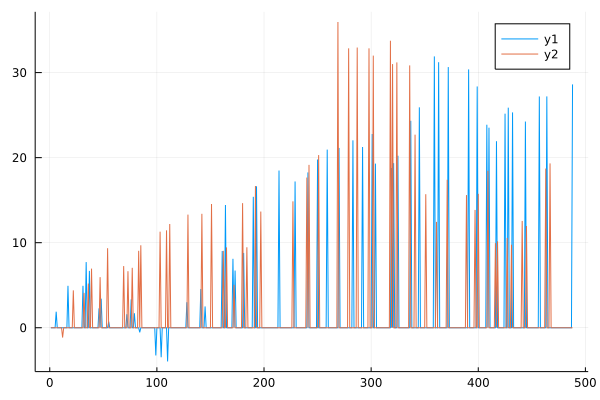

In [83]:
plot(PL1)
plot!(PL2)

In [84]:
gain1 = count(y->y>0,PL1)
loss1 = count(y->y<0,PL1)
gain2 = count(y->y>0,PL2)
loss2 = count(y->y<0,PL2)
@show gain1,loss1,gain2,loss2

(gain1, loss1, gain2, loss2) = (51, 4, 53, 1)


(51, 4, 53, 1)

In [85]:
function computeScore(PL)
    profit = count(y->y>0,PL)
    loss = count(y->y<0,PL)
    return profit / (profit+loss)
end
@show computeScore(PL1)
@show computeScore(PL2)

computeScore(PL1) = 0.9272727272727272
computeScore(PL2) = 0.9814814814814815


0.9814814814814815

In [86]:
n = length(PL1)

488

In [87]:
function accumulatePlot(PL)
    N = length(PL)
    acc = zeros(N)
    for i in 1:N
        if i == 1
            acc[i] = PL[i]
        else
            acc[i] = acc[i-1]+PL[i]
        end
    end
    return acc
end


accumulatePlot (generic function with 1 method)

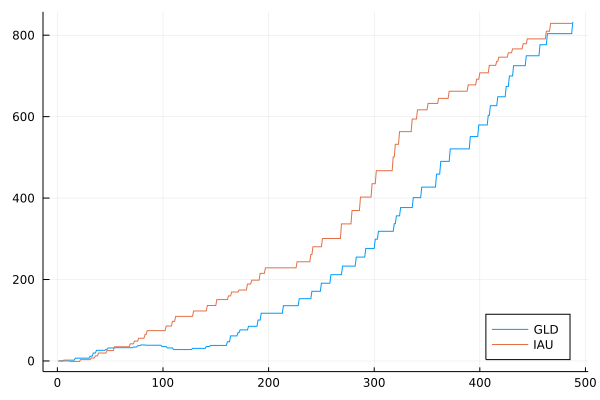

In [88]:
plot(accumulatePlot(PL1),label = tick1,legend=:bottomright)
plot!(accumulatePlot(PL2),label = tick2,legend=:bottomright)

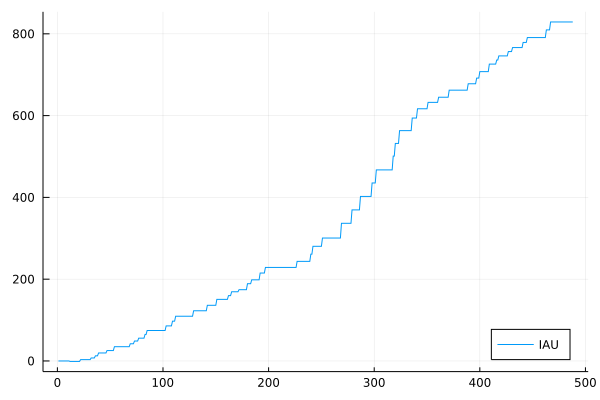

In [70]:
plot(accumulatePlot(PL2),label = tick2,legend=:bottomright)